<a href="https://colab.research.google.com/github/JFrankVC/deepL-intro/blob/main/ch03_introTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3.5 First steps with TensorFlow**

In [1]:
import tensorflow as tf

In [2]:
x = tf.ones(shape=(2, 1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [3]:
x = tf.zeros(shape=(2, 1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>

In [4]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[ 0.78983057],
       [-0.7339079 ],
       [-0.6729755 ]], dtype=float32)>

In [5]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.7225535 ],
       [0.0933553 ],
       [0.66312206]], dtype=float32)>

In [6]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
x

array([[0., 1.],
       [1., 1.]])

In [7]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.92408425],
       [ 0.35636863],
       [ 1.2622275 ]], dtype=float32)>

In [8]:
v.assign(tf.ones((3, 1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [9]:
v[0, 0].assign(3.)
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [10]:
v.assign_add(tf.ones((3, 1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [11]:
a = tf.ones((2, 2))*2
b = tf.square(a)
b

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>

In [12]:
c = tf.sqrt(a)
c

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1.4142135, 1.4142135],
       [1.4142135, 1.4142135]], dtype=float32)>

In [13]:
d = b + c
d

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[5.4142137, 5.4142137],
       [5.4142137, 5.4142137]], dtype=float32)>

In [14]:
e = tf.matmul(a, b)
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[16., 16.],
       [16., 16.]], dtype=float32)>

In [15]:
e *= d
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[86.62742, 86.62742],
       [86.62742, 86.62742]], dtype=float32)>

***3.5.3 GradientTape API***

${\displaystyle \nabla f(p)={\begin{bmatrix}{\frac {\partial f}{\partial x_{1}}}(p)\\\vdots \\{\frac {\partial f}{\partial x_{n}}}(p)\end{bmatrix}}}$

In [16]:
input_var = tf.Variable(initial_value=3.)
print(f"input var = {input_var}")
with tf.GradientTape() as tape:
   result = tf.square(input_var)
   print(f"result = {result}")
gradient = tape.gradient(result, input_var)
print(f"gradient = {gradient}")

input var = <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
result = 9.0
gradient = 6.0


In [17]:
input_const = tf.constant(3.)
print(f"input const = {input_const}")
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
   print(f"result = {result}")
gradient = tape.gradient(result, input_const)
print(f"gradient = {gradient}")

input const = 3.0
result = 9.0
gradient = 6.0


In [18]:
# Second order gradient (e.g., accel)
time = tf.Variable(3.)
print(f"time = {time}")
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
        print(f"pos = {position}")
    speed = inner_tape.gradient(position, time)
    print(f"speed = {speed}")
acceleration = outer_tape.gradient(speed, time)
print(f"accel = {acceleration}")

time = <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
pos = 44.10000228881836
speed = 29.400001525878906
accel = 9.800000190734863


### Generate two classes of random points in a 2D plane

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [57]:
negative_samples

array([[ 0.3619549 ,  3.23642449],
       [-0.25532431,  3.66201359],
       [-0.96204403,  2.09536087],
       ...,
       [ 0.46306909,  1.66125869],
       [ 0.30437203,  3.44066591],
       [-0.49164947,  2.56869055]])

<Axes: >

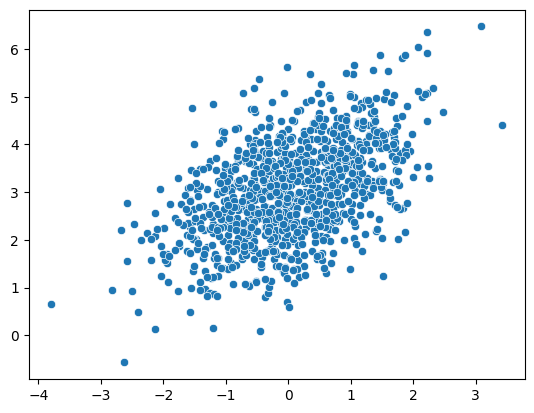

In [69]:
sns.scatterplot(x=negative_samples[:,0], y=negative_samples[:,1])

<Axes: >

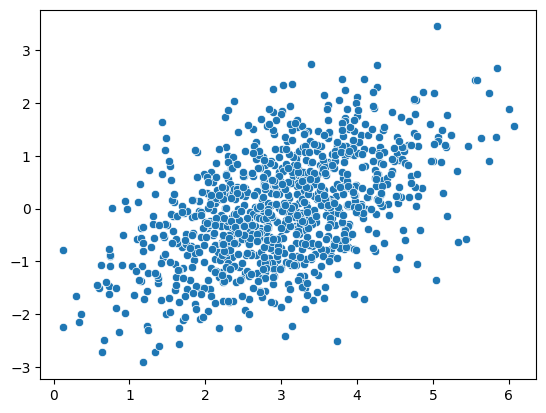

In [70]:
sns.scatterplot(x=positive_samples[:,0], y=positive_samples[:,1])

### Stacking the two classes into an array with shape (2000, 2)

In [61]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [62]:
inputs

array([[ 0.3619549 ,  3.2364244 ],
       [-0.2553243 ,  3.6620135 ],
       [-0.96204406,  2.0953608 ],
       ...,
       [ 2.1824539 , -2.2596385 ],
       [ 1.8212277 , -0.507116  ],
       [ 3.778186  ,  0.407595  ]], dtype=float32)

In [63]:
inputs.shape

(2000, 2)

### Generating the corresponding targets (0 and 1)

In [58]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

In [59]:
targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

### Plotting the two point classes

In [66]:
inputs

array([[ 0.3619549 ,  3.2364244 ],
       [-0.2553243 ,  3.6620135 ],
       [-0.96204406,  2.0953608 ],
       ...,
       [ 2.1824539 , -2.2596385 ],
       [ 1.8212277 , -0.507116  ],
       [ 3.778186  ,  0.407595  ]], dtype=float32)

In [65]:
inputs[:, 0]

array([ 0.3619549 , -0.2553243 , -0.96204406, ...,  2.1824539 ,
        1.8212277 ,  3.778186  ], dtype=float32)

In [68]:
inputs[:, 1]

array([ 3.2364244,  3.6620135,  2.0953608, ..., -2.2596385, -0.507116 ,
        0.407595 ], dtype=float32)

<Axes: >

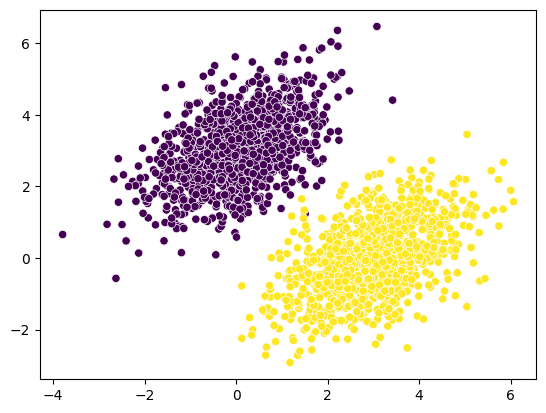

In [72]:
#plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
#plt.show()
sns.scatterplot(x=inputs[:, 0], y=inputs[:, 1], c=targets[:, 0])

### Creating the linear classifier variables

In [96]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [82]:
W,b

(<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[0.88076186],
        [0.7944937 ]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>)

### The forward pass function

In [83]:
def model(inputs):
    return tf.matmul(inputs, W) + b

### The mean squared error loss function

In [84]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

### The training step function

In [89]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

### The batch training loop

In [97]:
for step in range(50):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.0803
Loss at step 1: 0.1872
Loss at step 2: 0.1087
Loss at step 3: 0.0923
Loss at step 4: 0.0851
Loss at step 5: 0.0797
Loss at step 6: 0.0749
Loss at step 7: 0.0705
Loss at step 8: 0.0666
Loss at step 9: 0.0630
Loss at step 10: 0.0597
Loss at step 11: 0.0566
Loss at step 12: 0.0539
Loss at step 13: 0.0514
Loss at step 14: 0.0491
Loss at step 15: 0.0470
Loss at step 16: 0.0451
Loss at step 17: 0.0433
Loss at step 18: 0.0417
Loss at step 19: 0.0403
Loss at step 20: 0.0389
Loss at step 21: 0.0377
Loss at step 22: 0.0366
Loss at step 23: 0.0356
Loss at step 24: 0.0347
Loss at step 25: 0.0338
Loss at step 26: 0.0331
Loss at step 27: 0.0324
Loss at step 28: 0.0317
Loss at step 29: 0.0311
Loss at step 30: 0.0306
Loss at step 31: 0.0301
Loss at step 32: 0.0297
Loss at step 33: 0.0293
Loss at step 34: 0.0289
Loss at step 35: 0.0286
Loss at step 36: 0.0283
Loss at step 37: 0.0280
Loss at step 38: 0.0277
Loss at step 39: 0.0275
Loss at step 40: 0.0273
Loss at step 41: 0.0271
Lo

<Axes: >

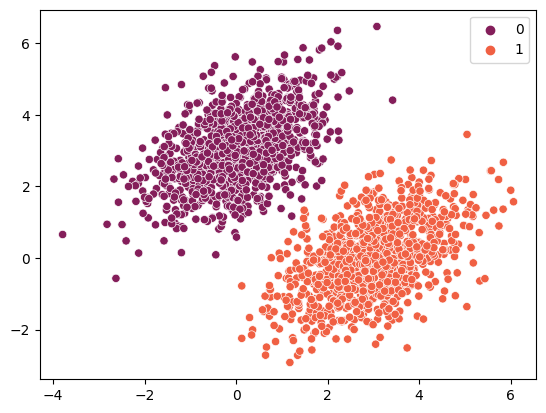

In [128]:
predictions = model(inputs)
sns.color_palette("rocket")

def hue_f(predictions):
    return np.uint8(predictions[:, 0] > 0.5)

sns.scatterplot(x=inputs[:, 0], y=inputs[:, 1], hue=hue_f(predictions), palette='rocket')
#plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
#plt.show()

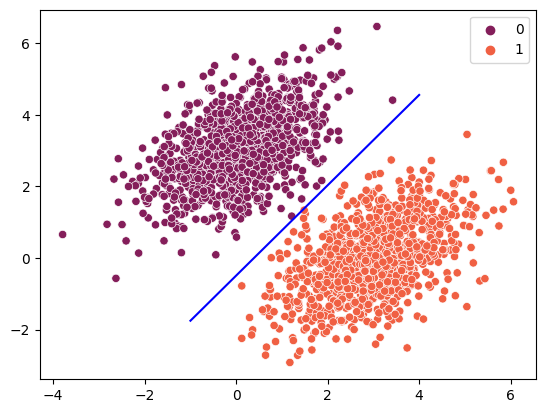

In [129]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]

def hue_f(predictions):
    return np.uint8(predictions[:, 0] > 0.5)

sns.scatterplot(x=inputs[:, 0], y=inputs[:, 1], hue=hue_f(predictions), palette='rocket')
plt.plot(x, y, "-b")